In [1]:
import os
os.chdir('..')

In [2]:
from fox.config import Config, PlaneRCNNConfig
from fox.dataset import ComboDataset, PlaneRCNNDataset, MidasDataset
from fox.yolov3.utils.utils import plot_images, load_classes
from fox.utils import parse_data_cfg
import matplotlib.pyplot as plt
import torch
import cv2

# Combo Dataset

In [19]:
d = ComboDataset(Config(DATA_DIR="data"))
loader = torch.utils.data.DataLoader(d, batch_size=2, shuffle=True, collate_fn=d.collate_fn)
stuff = next(iter(loader))

val_d = ComboDataset(Config(DATA_DIR="data"), train=False)
val_loader = torch.utils.data.DataLoader(val_d, batch_size=16, collate_fn=d.collate_fn)
val_stuff = next(iter(val_loader))

Caching labels data/yolo/labels.npy (3161 found, 0 missing, 42 empty, 0 duplicate, for 3203 images): 100%|██████████| 3203/3203 [00:01<00:00, 1917.39it/s]
Caching labels data/yolo/labels.npy (311 found, 0 missing, 7 empty, 0 duplicate, for 318 images): 100%|██████████| 318/318 [00:00<00:00, 459.86it/s]


In [20]:
val_imgs, _, val_yolo_data, _ = val_stuff
val_yolo_imgs, val_targets, val_paths, val_shapes, val_pad = val_yolo_data
data = parse_data_cfg("data/yolo/custom.data")
classes = load_classes(data["names"])


In [21]:
fname = "data/yolo__val_test.jpg"
if os.path.exists(fname):
    os.remove(fname)
res = plot_images(val_imgs, val_targets, val_paths, names=classes, fname=fname)

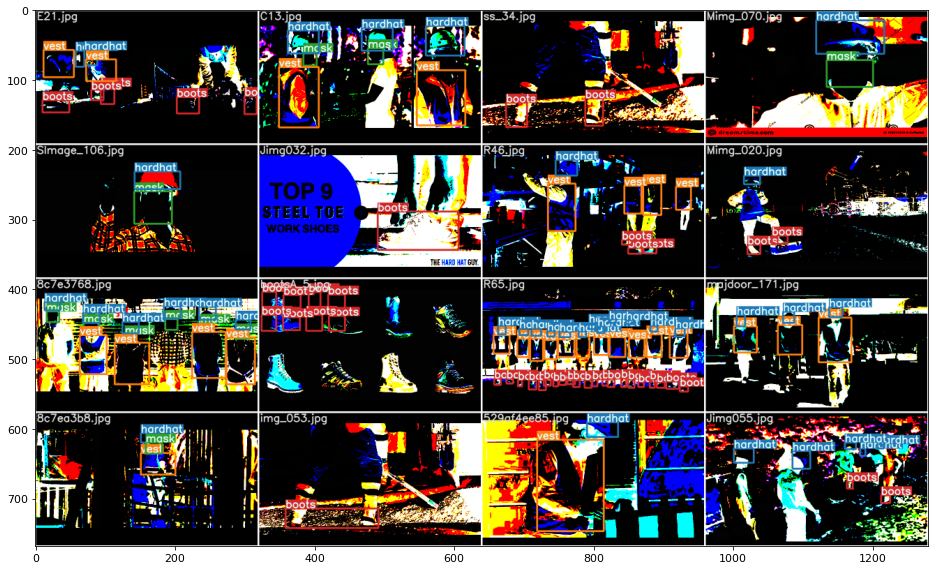

In [22]:
plt.figure(figsize=(16, 16))
plt.imshow(res)

In [15]:
imgs, midas_data, yolo_data, planercnn_data = stuff
imgs.shape

torch.Size([2, 3, 640, 640])

In [16]:
yolo_imgs, targets, paths, shapes, pad = yolo_data
data = parse_data_cfg("data/yolo/custom.data")
classes = load_classes(data["names"])

In [17]:
fname = "data/yolo_test.jpg"
if os.path.exists(fname):
    os.remove(fname)
res = plot_images(imgs, targets, paths, names=classes, fname=fname)

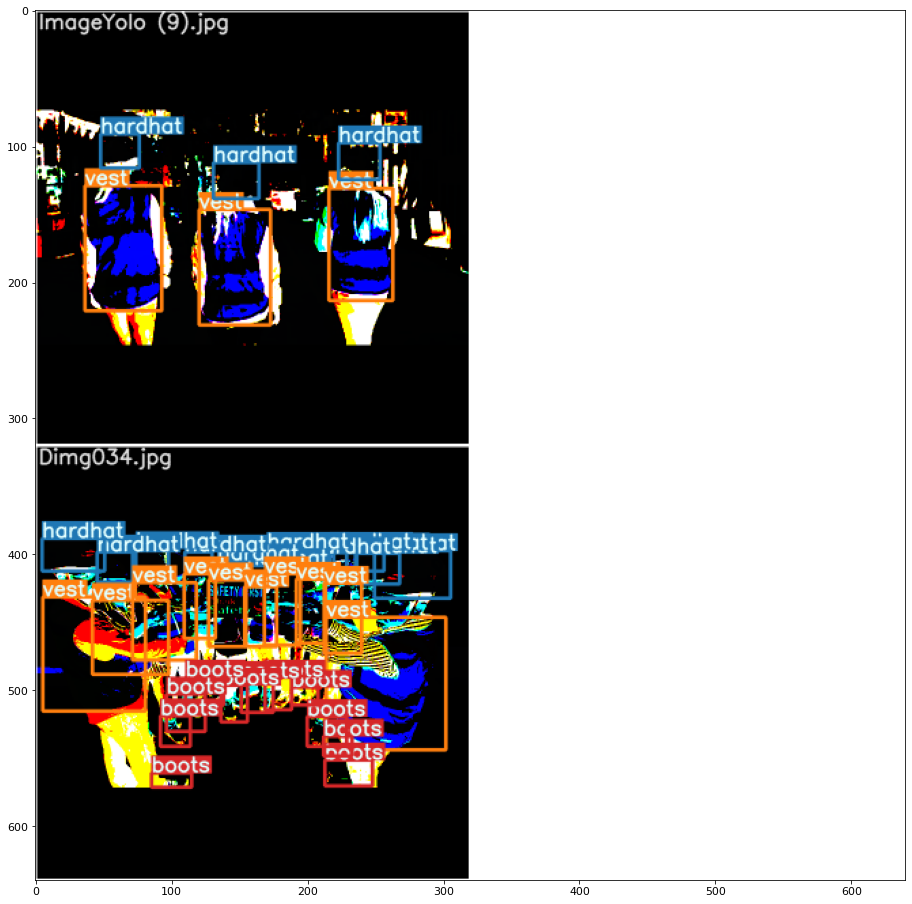

In [18]:
plt.figure(figsize=(16, 16))
plt.imshow(res)

In [5]:
yolo_data[-1]

((0.0, 114.5), (0.0, 140.5))

In [6]:
yolo_data[-3]

('data/mini/images/images70.jpg', 'data/mini/images/27bb806c8c.jpg')

## Actual input image

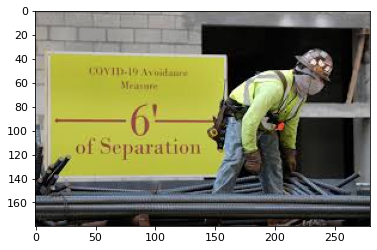

In [7]:
img = cv2.imread(yolo_data[-3][0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

## Input image from dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


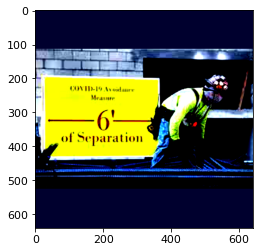

In [8]:
plt.imshow(imgs[0].permute(1, 2, 0))

## Displaying input image without padding

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


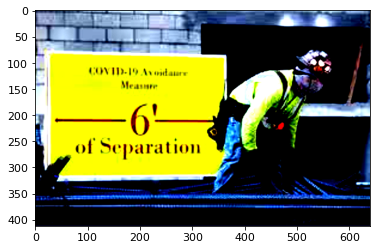

In [9]:
dw = int(yolo_data[-1][0][0])
dh = int(yolo_data[-1][0][1])

if dw == 0:
    plt.imshow(imgs[0].permute(1, 2, 0)[dh:-dh:,:,:])
else:
    plt.imshow(imgs[0].permute(1, 2, 0)[:,dw:-dw,:])

## Yolo Input image

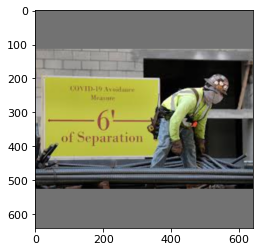

In [10]:
plt.imshow(yolo_data[0][0].permute(1, 2, 0))

## Midas input image and depth

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


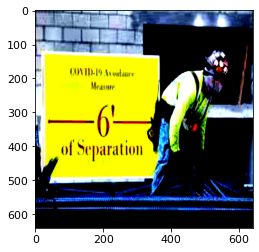

In [11]:
plt.imshow(midas_data[0][0].permute(1, 2, 0))

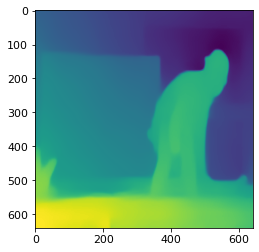

In [12]:
plt.imshow(midas_data[1][0].squeeze())

## PlaneRCNN input image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


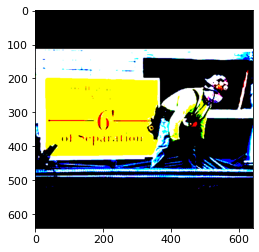

In [13]:
plt.imshow(planercnn_data[0][0][0].permute(1, 2, 0))

# PlaneRCNN Dataset

In [3]:
dataset = PlaneRCNNDataset(PlaneRCNNConfig())
loader = torch.utils.data.DataLoader(
    dataset,
    batch_size = 16,
    num_workers = 4,
    shuffle = True,
    pin_memory = True,
    collate_fn = dataset.collate_fn
)

In [4]:
stuff = next(iter(loader))

In [5]:
len(stuff)

16

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


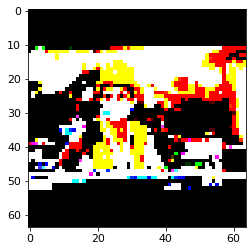

In [6]:
plt.imshow(stuff[0][0][0].permute(1, 2, 0))

In [6]:
for i in range(12):
    print(type(stuff[0][i]))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [7]:
for i in range(12):
    print(stuff[0][i].shape)

torch.Size([1, 3, 640, 640])
torch.Size([1, 16])
torch.Size([1, 102300, 1])
torch.Size([1, 256, 4])
torch.Size([1, 13])
torch.Size([1, 13, 4])
torch.Size([1, 13, 56, 56])
torch.Size([1, 13, 3])
torch.Size([1, 640, 640])
torch.Size([1, 4, 4])
torch.Size([1, 640, 640])
torch.Size([6])


# Midas dataset

In [3]:
dataset = MidasDataset(Config)
loader = torch.utils.data.DataLoader(
    dataset,
    batch_size = 2,
    num_workers = 4,
    shuffle = True,
    pin_memory = True,
    # collate_fn = dataset.collate_fn
)

In [4]:
stuff = next(iter(loader))

In [5]:
stuff[1].shape

torch.Size([2, 1, 416, 416])

In [6]:
stuff[0].shape

torch.Size([2, 3, 416, 416])

## Yolo Dataset

In [21]:
from fox.yolov3.utils.datasets import LoadImagesAndLabels
from fox.yolov3.utils.utils import plot_images, load_classes
from fox.utils import parse_data_cfg
import torch
import matplotlib.pyplot as plt
import os

In [18]:
data = parse_data_cfg("data/yolo/custom.data")
classes = load_classes(data["names"])

In [27]:
dataset = LoadImagesAndLabels(data["train"], mosiac=False, label_files_path=data["labels"])
loader = torch.utils.data.DataLoader(dataset, batch_size=16, collate_fn=dataset.collate_fn)

val_dataset = LoadImagesAndLabels(data["valid"], rect=True, mosiac=False, label_files_path=data["labels"])
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=16, collate_fn=val_dataset.collate_fn)

Caching labels data/yolo/labels.npy (3161 found, 0 missing, 42 empty, 0 duplicate, for 3203 images): 100%|██████████| 3203/3203 [00:00<00:00, 13364.82it/s]
Caching labels data/yolo/labels.npy (311 found, 0 missing, 7 empty, 0 duplicate, for 318 images): 100%|██████████| 318/318 [00:00<00:00, 2508.80it/s]


In [28]:
stuff = next(iter(loader))
imgs, targets, paths, shapes, pad = stuff

val_stuff = next(iter(val_loader))
val_imgs, val_targets, val_paths, val_shapes, val_pad = val_stuff

In [29]:
fname = "data/yolo_test.jpg"
if os.path.exists(fname):
    os.remove(fname)
res = plot_images(imgs, targets, paths, names=classes, fname=fname)

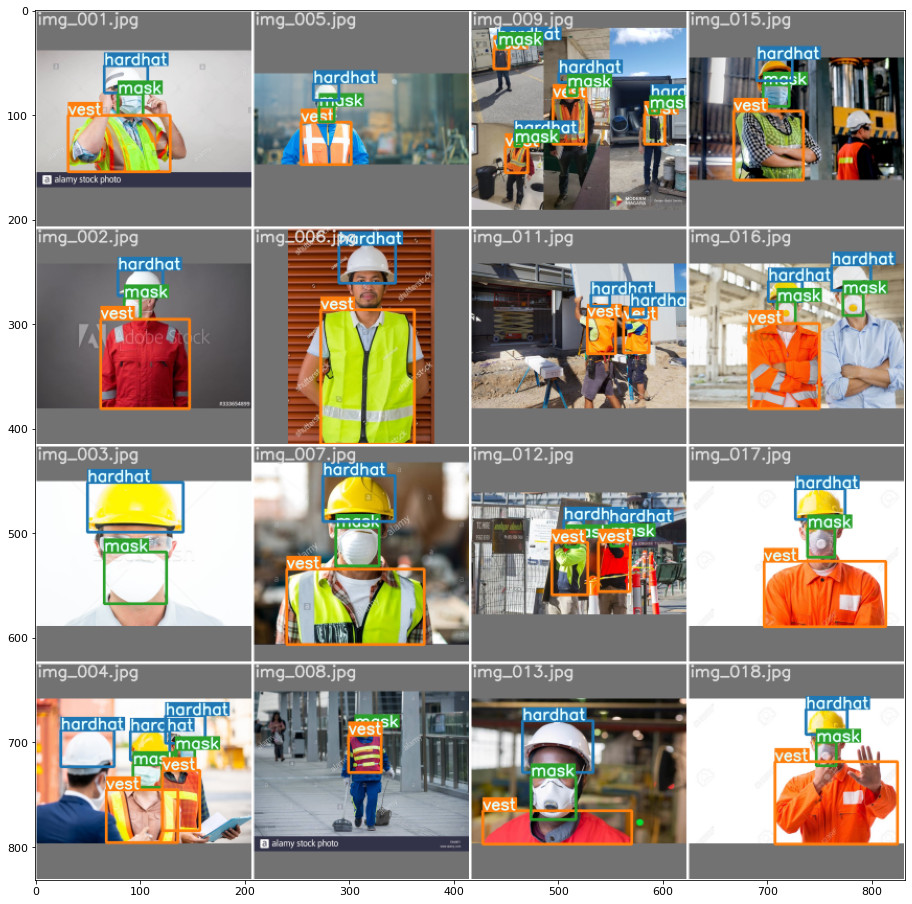

In [30]:
plt.figure(figsize=(16, 16))
plt.imshow(res)

In [31]:
fname = "data/yolo_val_test.jpg"
if os.path.exists(fname):
    os.remove(fname)
res = plot_images(val_imgs, val_targets, val_paths, names=classes, fname=fname)

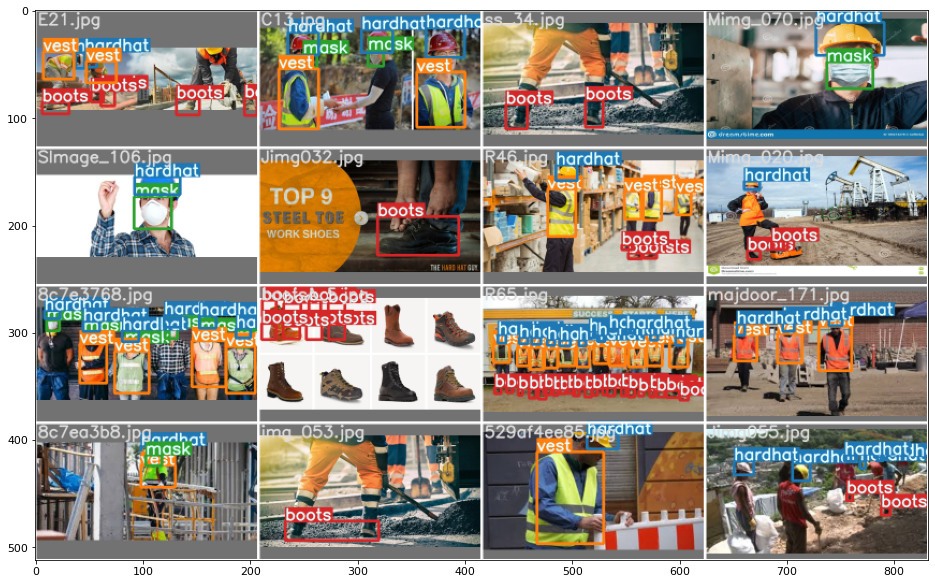

In [32]:
plt.figure(figsize=(16, 16))
plt.imshow(res)